In [ ]:
!pip install --user pipwin

#it is for windows used to work with pyaudio

In [ ]:
!C:\Users\talmeez\AppData\Roaming\Python\Python310\Scripts\pipwin install PyAudio
    
#It is internally used by speech recognition library.
#PyAudio,can easily use Python to play and record audio on a variety of platforms,Linux,Windows, and macOS.

In [ ]:
!pip install SpeechRecognition

#Library for performing speech recognition, with support for several engines and APIs, online and offline

In [ ]:
!pip install textblob

#TextBlob is a Pythonlibrary for processing textual data.
#It provides a simple API for diving into common natural language processing (NLP) tasks such as,
#tagging,extraction,sentiment analysis,classification

In [1]:
import speech_recognition as sr

In [2]:
def recognize_speech_from_mic(recognizer, microphone):   #function

    # check that recognizer and microphone arguments are appropriate type
    if not isinstance(recognizer, sr.Recognizer):
        raise TypeError("`recognizer` must be `Recognizer` instance")

    if not isinstance(microphone, sr.Microphone):
        raise TypeError("`microphone` must be `Microphone` instance")

    # adjust the recognizer sensitivity to ambient noise and record audio
    # from the microphone
    with microphone as source:
        recognizer.adjust_for_ambient_noise(source) # #  analyze the audio source for 1 second
        audio = recognizer.listen(source)   #audio is captured

    # set up the response object
    response = {
        "success": True,
        "error": None,
        "transcription": None
    }

    # try recognizing the speech in the recording
    # if a RequestError or UnknownValueError exception is caught,
    #   update the response object accordingly
    try:
        response["transcription"] = recognizer.recognize_google(audio)  #by default function used by SR that uses default cases
    except sr.RequestError:
        # API was unreachable or unresponsive
        response["success"] = False
        response["error"] = "API unavailable/unresponsive"
    except sr.UnknownValueError:
        # speech was unintelligible
        response["error"] = "Unable to recognize speech"

    return response


#here conversion of audio into text is done

In [3]:
recognizer = sr.Recognizer()   #here we identify the voice with the microphone

In [4]:
mic = sr.Microphone(device_index=1)     #here we identify the voice with the microphone

In [5]:
response = recognize_speech_from_mic(recognizer, mic)   #Both parameters are passed to function and response is generated if no error

In [6]:
print('\nSuccess : {}\nError   : {}\n\nText from Speech\n{}\n\n{}' \
          .format(response['success'],
                  response['error'],
                  '-'*17,
                  response['transcription']))
#printing wheather successs or failur


Success : True
Error   : None

Text from Speech
-----------------

hello hello


In [7]:


temp_str = ''#.....................pass various strings
records_all = []#..................Empty list that will be filled with string to be talked
while (temp_str != 'bye'):#..........................A contionuouis loop to be breaked whenever 'bye' is said
    print('Speak it out')
    response = recognize_speech_from_mic(recognizer, mic) #
    if response['success']:#............If success then voice is captured
        temp_str = response['transcription']
        print('You said :' ,temp_str )#...........Printing whatever had been said so far
        if (temp_str != 'bye'):#.....................If 'bye word has been said then recording is stopped'
            records_all.append(temp_str)#......................Appending the text
print('Stop')
print(records_all)

Speak it out
You said : I am very much happy to having this team in mini project group so yes I am very much happy thank you lot
Speak it out
You said : bola na program run thoda sa time virus program program is not running so fast so much slow shit why this program is not working properly stitch by
Speak it out
You said : None
Speak it out
You said : bye bye
Speak it out
You said : bye
Stop
['I am very much happy to having this team in mini project group so yes I am very much happy thank you lot', 'bola na program run thoda sa time virus program program is not running so fast so much slow shit why this program is not working properly stitch by', None, 'bye bye']


In [8]:
#records_all.remove(None)

In [9]:
from textblob import TextBlob      #sentiment analyzer

In [10]:
def get_sentiment(sentx):      #function
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed text
        analysis = TextBlob(sentx)
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return ('positive')
        elif analysis.sentiment.polarity == 0:
            return ('neutral')
        else:
            return ('negative')

In [11]:
# Select from collection
sentimets_total = {'neutral': 0 , 'positive' : 0 , 'negative':0}
for i in records_all:
    sentiment = get_sentiment(i)
    print (sentiment,'===>',i)
    sentimets_total[sentiment] = sentimets_total[sentiment] + 1
print(sentimets_total)

positive ===> I am very much happy to having this team in mini project group so yes I am very much happy thank you lot
negative ===> bola na program run thoda sa time virus program program is not running so fast so much slow shit why this program is not working properly stitch by


TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'NoneType'>

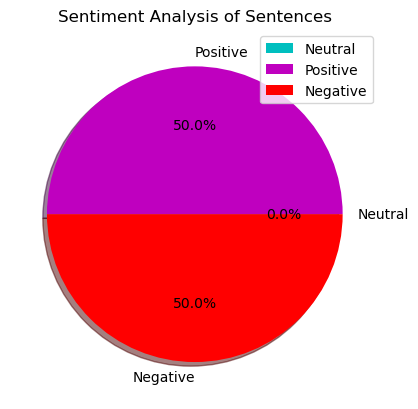

In [12]:
from matplotlib import pyplot as plt
slices = [sentimets_total['neutral'],sentimets_total['positive'],sentimets_total['negative']]
activities = ['Neutral','Positive','Negative']
cols = ['c','m','r',]

plt.pie(slices,
        labels=activities,
        colors=cols,
        shadow= True,
        autopct='%1.1f%%')

plt.title('Sentiment Analysis of Sentences')
plt.legend()
plt.show()
